In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./datas/train_ver2', index_col=[0])
train.tail()

,comments,bias_label,gender_label,hate_label,news_title,comment_pos,title_pos
7891,힘내세요 응원합니다,none,False,none,허지웅 허투루 넘길 말 없었다솔직하게 드러냈던 속사정,"[('힘내세요', 'Verb'), ('응원', 'Noun'), ('합니다', 'Ve...","[('허지웅', 'Noun'), ('허투루', 'Noun'), ('넘길', 'Ver..."
7892,힘내세요삼가 고인의 명복을 빕니다,none,False,none,이혜경 오 캐롤’ 공연 중 남편 오정욱 부고오열 속 발인 종합,"[('힘내세요', 'Verb'), ('삼가', 'Verb'), ('고인', 'Nou...","[('이혜경', 'Noun'), ('오', 'Noun'), ('캐롤', 'Noun'..."
7893,힘내세용 항상 응원합니닷,none,False,none,설경구♥ 송윤아 아들과 즐거운 하루 전 엄마니까요,"[('힘내세용', 'Verb'), ('항상', 'Noun'), ('응원', 'Nou...","[('설경구', 'Noun'), ('♥', 'Foreign'), ('송윤아', 'N..."
7894,힘내소연기로 답해요나도 53살 인데 이런일 저런일 다 있더라구요인격을 믿습니다홨팅,none,False,none,현장연예인 인생 협박 유감미소잃은 최민수 보복운전 혐의 2차 공판종합,"[('힘내소', 'Verb'), ('연기', 'Noun'), ('로', 'Josa'...","[('현장', 'Noun'), ('연예인', 'Noun'), ('인생', 'Noun..."
7895,힘들면 관뒀어야지 그게 현명한거다,none,False,none,단독스태프 사망사고 서른이지만 결국 오늘 촬영 취소,"[('힘들면', 'Adjective'), ('관', 'Noun'), ('뒀어야지',...","[('단독', 'Noun'), ('스태프', 'Noun'), ('사망', 'Noun..."


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7896 entries, 0 to 7895
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comments      7896 non-null   object
 1   bias_label    7896 non-null   object
 2   gender_label  7896 non-null   bool  
 3   hate_label    7896 non-null   object
 4   news_title    7896 non-null   object
 5   comment_pos   7896 non-null   object
 6   title_pos     7896 non-null   object
dtypes: bool(1), object(6)
memory usage: 439.5+ KB


In [4]:
from konlpy.tag import Okt
t = Okt()
import nltk

text = ''
for each in train['comments']:
    text = text + each + '\n'

In [5]:
tokens_ko = t.nouns(text)

In [6]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(20)

[('여자', 541),
 ('사람', 540),
 ('왜', 480),
 ('진짜', 407),
 ('좀', 384),
 ('남자', 316),
 ('더', 287),
 ('뭐', 272),
 ('때', 268),
 ('애', 257),
 ('결혼', 240),
 ('이', 238),
 ('거', 233),
 ('그냥', 229),
 ('말', 227),
 ('연기', 223),
 ('드라마', 215),
 ('얼굴', 210),
 ('돈', 208),
 ('생각', 193)]

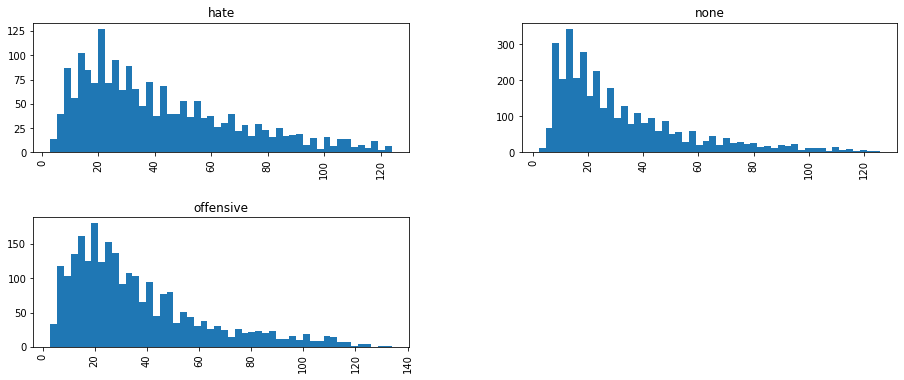

In [7]:
train['length'] = train['comments'].apply(len)
train.hist(column='length', by='hate_label', bins=50, figsize=(15,6));

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

tfidf = TfidfVectorizer()
tfidf.fit(train['comments'])
Counter(tfidf.vocabulary_).most_common(20)


[('힙합하면', 36480),
 ('힙합이네', 36479),
 ('힙합은', 36478),
 ('힙합계에서', 36477),
 ('힙한', 36476),
 ('힙찔이', 36475),
 ('힘이랄까', 36474),
 ('힘이', 36473),
 ('힘은', 36472),
 ('힘으로', 36471),
 ('힘쎈', 36470),
 ('힘써주세요', 36469),
 ('힘빠지게', 36468),
 ('힘듬윤박이라는', 36467),
 ('힘들텐데좀', 36466),
 ('힘들텐데', 36465),
 ('힘들지만', 36464),
 ('힘들지', 36463),
 ('힘들었을텐데', 36462),
 ('힘들었을듯', 36461)]

In [16]:
comments = list(train['comments'])
comments[:15]

['현재 호텔주인 심정 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속 추모받네',
 '한국적인 미인의 대표적인 분너무나 곱고아름다운모습그모습뒤의 슬픔을 미처 알지못했네요',
 '못된 넘들남의 고통을 즐겼던 넘들이젠 마땅한 처벌을 받아야지그래야 공정한 사회지심은대로 거두거라',
 '12화 어설펐는데 34화 지나서부터는 갈수록 너무 재밌던데',
 '1 사람 얼굴 손톱으로 긁은것은 인격살해이고2 동영상이 몰카냐 메걸리안들 생각이 없노',
 '108 진짜 이승기랑 비교된다',
 '100년안에 남녀간 성전쟁 한번 크게 치룬 후 일부다처제 여성의 정치참여 금지 여성 투표권 삭제가 세계의 공통문화로 자리잡을듯 암탉이 너무 울어댐',
 '10년뒤 윤서인은 분명히 재평가될것임 말하나하나가 틀린게없음',
 '10년만에 재미를 느끼는 프로였는데왜 니들때문에 폐지를해야되냐',
 '10년차방탄팬인데 우리방탄처럼 성공은못하겠지만 일단 방탄의 부하가되고싶다는거니 이름기억은해둠',
 '10살 차이가 넘을텐데 부부라고 무슨 내용인지 긍금하네',
 '12월이나 1월이더 결혼성수기지 5월은 여름이라 비수기에속한다',
 '13살 차이면 요즘 세상에 놀랄일도 아니네요',
 '1400억 뜯기고 얼마나 억울 했을꼬 뒤질만큼 아플만 하지',
 '15년생인 울아들은 유모차 안타는데']

In [18]:
tokenized_comments = [r.split() for r in comments]
tokenized_comments[:5]

[['현재',
  '호텔주인',
  '심정',
  '아18',
  '난',
  '마른하늘에',
  '날벼락맞고',
  '호텔망하게생겼는데',
  '누군',
  '계속',
  '추모받네'],
 ['한국적인', '미인의', '대표적인', '분너무나', '곱고아름다운모습그모습뒤의', '슬픔을', '미처', '알지못했네요'],
 ['못된',
  '넘들남의',
  '고통을',
  '즐겼던',
  '넘들이젠',
  '마땅한',
  '처벌을',
  '받아야지그래야',
  '공정한',
  '사회지심은대로',
  '거두거라'],
 ['12화', '어설펐는데', '34화', '지나서부터는', '갈수록', '너무', '재밌던데'],
 ['1',
  '사람',
  '얼굴',
  '손톱으로',
  '긁은것은',
  '인격살해이고2',
  '동영상이',
  '몰카냐',
  '메걸리안들',
  '생각이',
  '없노']]

In [23]:
len_by_token = [len(t) for t in tokenized_comments]
len_by_token[:15]

[11, 8, 11, 7, 11, 4, 20, 6, 6, 7, 7, 6, 6, 8, 4]

In [24]:
len_by_eumjeol = [len(s) for s in comments]
len_by_eumjeol[:15]

[49, 46, 53, 32, 47, 16, 81, 33, 34, 51, 30, 34, 24, 32, 19]

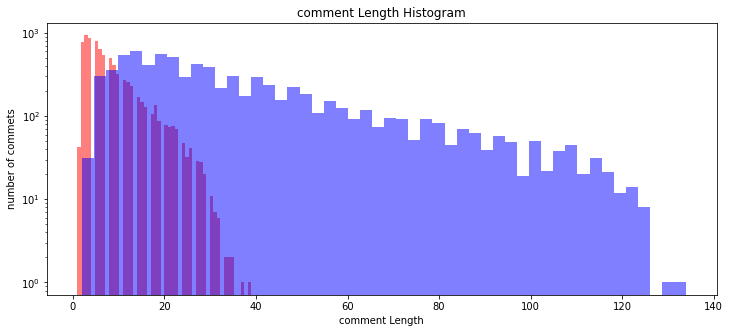

In [30]:
plt.figure(figsize=(12,5))
plt.hist(len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')
plt.title('comment Length Histogram')
plt.xlabel('comment Length')
plt.ylabel('number of commets');

In [31]:
print('문장 최대길이: {}'.format(np.max(len_by_token)))
print('문장 최소길이: {}'.format(np.min(len_by_token)))
print('문장 평균길이: {:.2f}'.format(np.mean(len_by_token)))
print('문장 길이 표준편차: {:2f}'.format(np.std(len_by_token)))
print('문장 중간길이: {}'.format(np.median(len_by_token)))
print('제 1 사분위 길이: {}'.format(np.percentile(len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(len_by_token, 75)))

문장 최대길이: 39
문장 최소길이: 1
문장 평균길이: 8.18
문장 길이 표준편차: 5.991117
문장 중간길이: 6.0
제 1 사분위 길이: 4.0
제 3 사분위 길이: 11.0


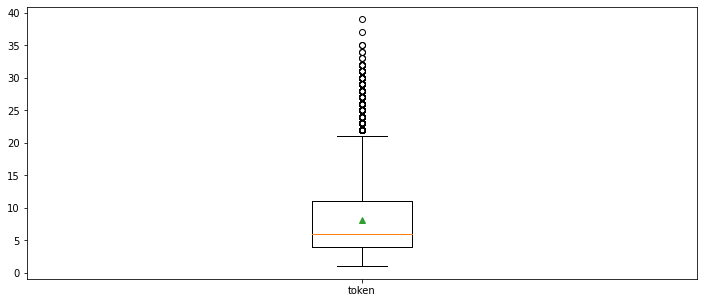

In [32]:
plt.figure(figsize=(12,5))
plt.boxplot([len_by_token], labels=['token'], showmeans=True);

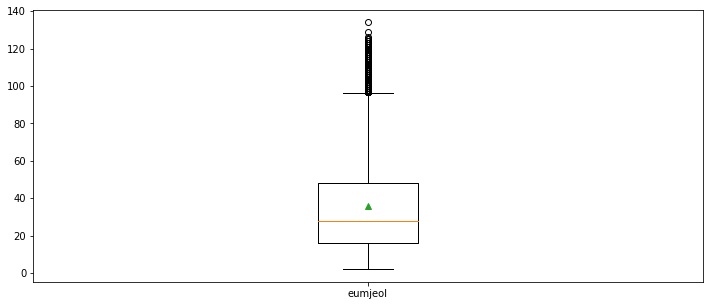

In [33]:
plt.figure(figsize=(12,5))
plt.boxplot([len_by_eumjeol], labels=['eumjeol'], showmeans=True);

## plot each hate__labels' word distances

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from future.utils import iteritems
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager
f_path = "C:\Windows\Fonts\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family='Malgun Gothic')

In [27]:
train = pd.read_csv('./datas/train_ver2', index_col=[0])
train.tail()

,comments,bias_label,gender_label,hate_label,news_title,comment_pos,title_pos
7891,힘내세요 응원합니다,none,False,none,허지웅 허투루 넘길 말 없었다솔직하게 드러냈던 속사정,"[('힘내세요', 'Verb'), ('응원', 'Noun'), ('합니다', 'Ve...","[('허지웅', 'Noun'), ('허투루', 'Noun'), ('넘길', 'Ver..."
7892,힘내세요삼가 고인의 명복을 빕니다,none,False,none,이혜경 오 캐롤’ 공연 중 남편 오정욱 부고오열 속 발인 종합,"[('힘내세요', 'Verb'), ('삼가', 'Verb'), ('고인', 'Nou...","[('이혜경', 'Noun'), ('오', 'Noun'), ('캐롤', 'Noun'..."
7893,힘내세용 항상 응원합니닷,none,False,none,설경구♥ 송윤아 아들과 즐거운 하루 전 엄마니까요,"[('힘내세용', 'Verb'), ('항상', 'Noun'), ('응원', 'Nou...","[('설경구', 'Noun'), ('♥', 'Foreign'), ('송윤아', 'N..."
7894,힘내소연기로 답해요나도 53살 인데 이런일 저런일 다 있더라구요인격을 믿습니다홨팅,none,False,none,현장연예인 인생 협박 유감미소잃은 최민수 보복운전 혐의 2차 공판종합,"[('힘내소', 'Verb'), ('연기', 'Noun'), ('로', 'Josa'...","[('현장', 'Noun'), ('연예인', 'Noun'), ('인생', 'Noun..."
7895,힘들면 관뒀어야지 그게 현명한거다,none,False,none,단독스태프 사망사고 서른이지만 결국 오늘 촬영 취소,"[('힘들면', 'Adjective'), ('관', 'Noun'), ('뒀어야지',...","[('단독', 'Noun'), ('스태프', 'Noun'), ('사망', 'Noun..."


In [28]:
none = train[train['hate_label'] == 'none']
hate = train[train['hate_label'] == 'hate']
offensive = train[train['hate_label'] == 'offensive']

In [29]:
## none data

In [30]:
words = ''
for each in none['comments']:
    words = words + ' ' + each
as_one = words.split()

In [31]:
counts = Counter(as_one)
vocab = sorted(counts, key=counts.get, reverse=True)

In [33]:
word_idx = {word.encode('utf8').decode('utf8'): i for i, word in enumerate(vocab,1)}
Counter(word_idx).most_common(20)

[('현명한거다', 16276),
 ('관뒀어야지', 16275),
 ('믿습니다홨팅', 16274),
 ('있더라구요인격을', 16273),
 ('저런일', 16272),
 ('이런일', 16271),
 ('답해요나도', 16270),
 ('힘내소연기로', 16269),
 ('응원합니닷', 16268),
 ('힘내세용', 16267),
 ('힘내세요삼가', 16266),
 ('않내요', 16265),
 ('추스려지지', 16264),
 ('보내고', 16263),
 ('사촌오빠를', 16262),
 ('이틀전', 16261),
 ('힘내세요저두', 16260),
 ('잠이나자라', 16259),
 ('응원합니다악플러들그냥술한잔하고', 16258),
 ('백년만년갈것도', 16257)]

In [34]:
idx_word = {i: word for i, word in enumerate(vocab)}
Counter(idx_word).most_common(20)

[(6051, '힙합계에서'),
 (4599, '힙한'),
 (2346, '힘이'),
 (13879, '힘은'),
 (13323, '힘써주세요'),
 (9412, '힘듬윤박이라는'),
 (9159, '힘들텐데좀'),
 (13273, '힘들텐데'),
 (6254, '힘들지만'),
 (9164, '힘들지'),
 (1389, '힘들었을텐데'),
 (8144, '힘들었을듯'),
 (6514, '힘들었으면'),
 (3785, '힘들었는데'),
 (6587, '힘들었나보다'),
 (13327, '힘들어하지직접들어보면'),
 (14067, '힘들어하던거'),
 (15007, '힘들어하는데'),
 (13564, '힘들어도'),
 (1479, '힘들면')]

In [148]:
tfidf = TfidfVectorizer(sublinear_tf=True, max_features = 1000, max_df=0.90, min_df=9)
tfidf_none = tfidf.fit_transform(none['comments'])
tfidf_dict = tfidf.get_feature_names()

In [149]:
data_array = tfidf_none.toarray()
data = pd.DataFrame(data_array, columns=tfidf_dict)
data.shape

(3486, 188)

In [150]:
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)

In [151]:
Z = tsne.fit_transform(data_array.T)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 188 samples in 0.002s...
[t-SNE] Computed neighbors for 188 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 188 / 188
[t-SNE] Mean sigma: 0.850866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 137.350159
[t-SNE] KL divergence after 3850 iterations: 1.578286


In [152]:
print(Z[0:5])
print('Top words: ', len(Z))

[[   3.1460989 -171.35957  ]
 [  11.382986   174.3193   ]
 [  11.011755   -15.250795 ]
 [ -13.370927     3.19457  ]
 [ -56.03672    160.24658  ]]
Top words:  188


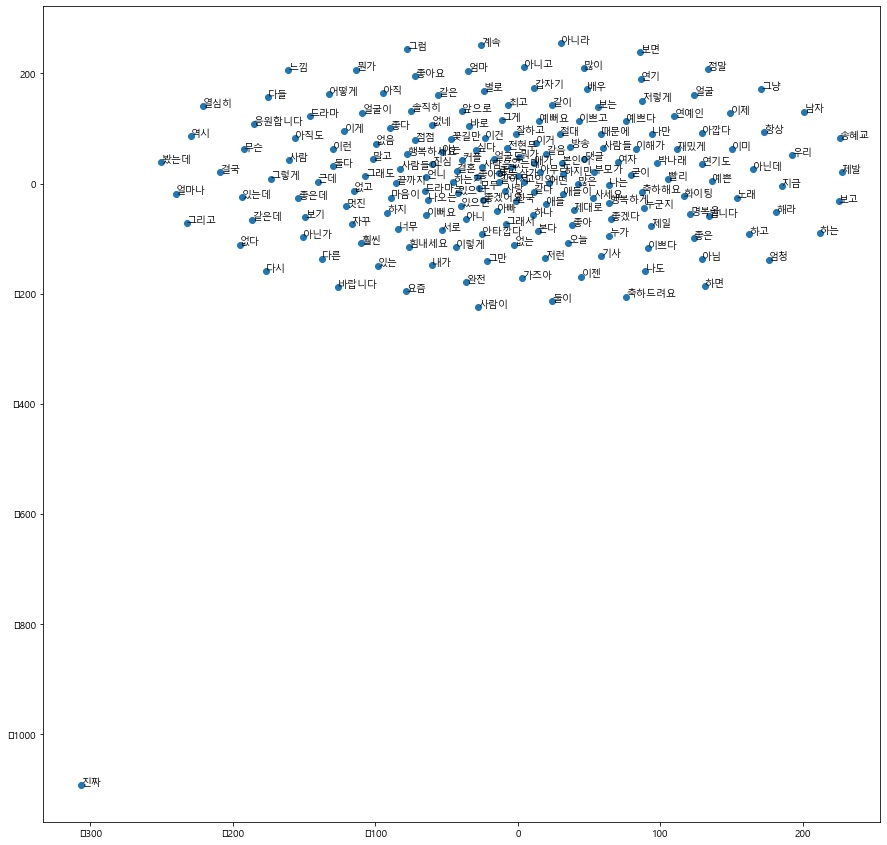

In [153]:
plt.figure(figsize=(15,15))
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_dict)):
    plt.annotate(s=tfidf_dict[i].encode('utf8').decode('utf8'), xy=(Z[i,0], Z[i,1]))
plt.draw()

In [17]:
## offensive data

In [154]:
words = ''
for each in offensive['comments']:
    words = words + ' ' + each
as_one = words.split()

In [155]:
counts = Counter(as_one)
vocab = sorted(counts, key=counts.get, reverse=True)

In [156]:
word_idx = {word.encode('utf8').decode('utf8'): i for i, word in enumerate(vocab,1)}

In [157]:
idx_word = {i: word for i, word in enumerate(vocab)}

In [158]:
tfidf = TfidfVectorizer(sublinear_tf=True, max_features = 1000, max_df=0.95, min_df=9)
tfidf_offensive = tfidf.fit_transform(offensive['comments'])
tfidf_dict = tfidf.get_feature_names()

In [159]:
data_array = tfidf_offensive.toarray()
data = pd.DataFrame(data_array, columns=tfidf_dict)
data.shape

(2499, 135)

In [160]:
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)

In [161]:
Z = tsne.fit_transform(data_array.T)

print(Z[0:5])
print('Top words: ', len(Z))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 135 samples in 0.001s...
[t-SNE] Computed neighbors for 135 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 135 / 135
[t-SNE] Mean sigma: 0.905980
[t-SNE] KL divergence after 250 iterations with early exaggeration: 122.955879
[t-SNE] KL divergence after 2600 iterations: 1.294357
[[ -13.383376    75.081726 ]
 [  24.233467     2.0969908]
 [  96.73806    -59.00819  ]
 [  44.362804    27.230326 ]
 [ -32.00419   -115.87922  ]]
Top words:  135


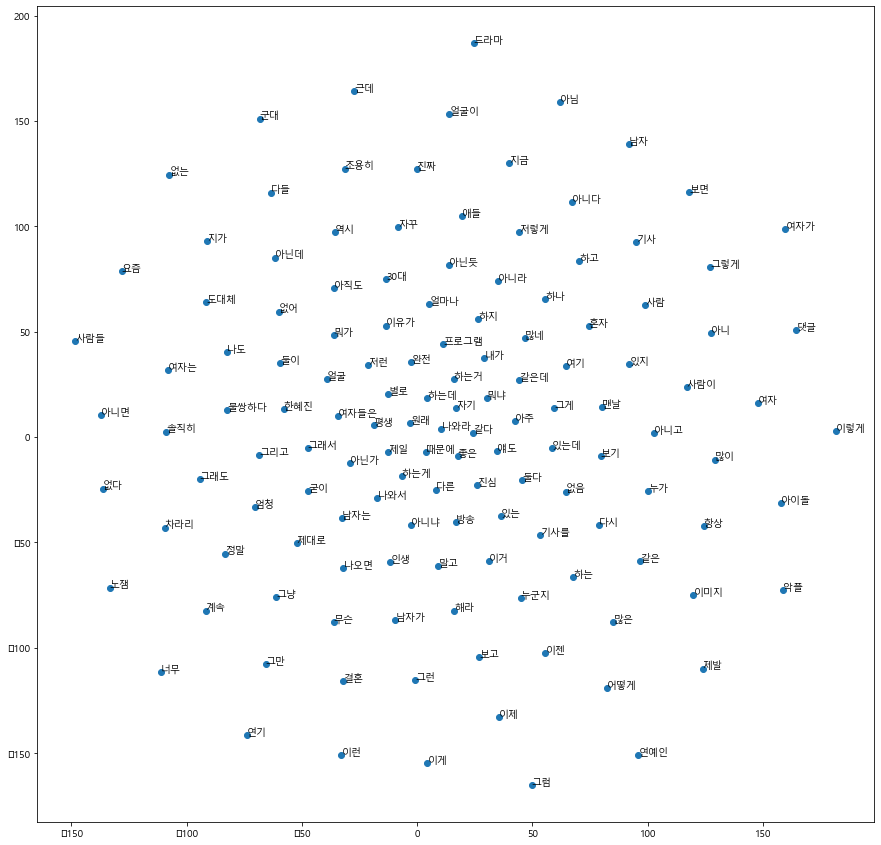

In [162]:
plt.figure(figsize=(15,15))
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_dict)):
    plt.annotate(s=tfidf_dict[i].encode('utf8').decode('utf8'), xy=(Z[i,0], Z[i,1]))
plt.draw()

In [ ]:
## hate

In [85]:
words = ''
for each in hate['comments']:
    words = words + ' ' + each
as_one = words.split()

In [86]:
counts = Counter(as_one)
vocab = sorted(counts, key=counts.get, reverse=True)

In [87]:
word_idx = {word.encode('utf8').decode('utf8'): i for i, word in enumerate(vocab,1)}

In [88]:
idx_word = {i: word for i, word in enumerate(vocab)}

In [109]:
tfidf = TfidfVectorizer(sublinear_tf=True, max_features = 1000, max_df=0.95, min_df=5)
tfidf_hate = tfidf.fit_transform(hate['comments'])
tfidf_dict = tfidf.get_feature_names()

In [110]:
data_array = tfidf_hate.toarray()
data = pd.DataFrame(data_array, columns=tfidf_dict)
data.shape

(1911, 289)

In [111]:
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)

In [112]:
Z = tsne.fit_transform(data_array.T)

print(Z[0:5])
print('Top words: ', len(Z))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 289 samples in 0.001s...
[t-SNE] Computed neighbors for 289 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 289 / 289
[t-SNE] Mean sigma: 0.552437
[t-SNE] KL divergence after 250 iterations with early exaggeration: 152.385162
[t-SNE] KL divergence after 4100 iterations: 1.770087
[[-7.6290193 -1.986902 ]
 [-7.4558845 -1.2671425]
 [-7.43923   -1.8459473]
 [-7.9316664 -1.2143512]
 [-8.752332  -3.062372 ]]
Top words:  289


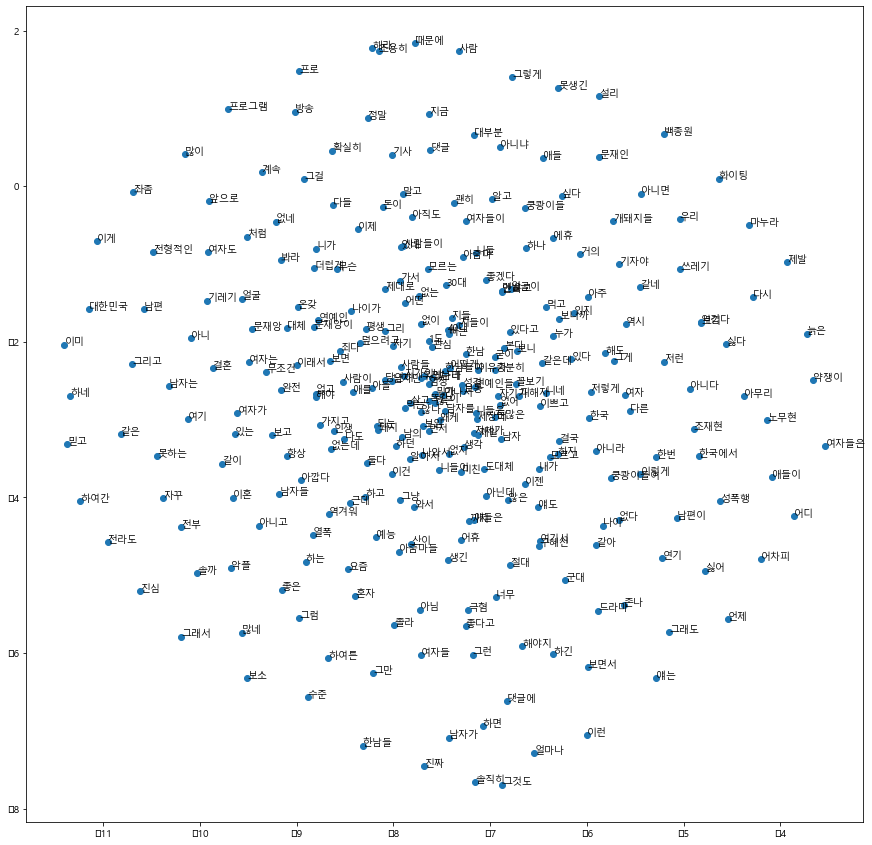

In [113]:
plt.figure(figsize=(15,15))
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_dict)):
    plt.annotate(s=tfidf_dict[i].encode('utf8').decode('utf8'), xy=(Z[i,0], Z[i,1]))
plt.draw()